In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score
import joblib
import os
from imblearn.over_sampling import SMOTE

In [2]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.metrics import Precision, Recall
from keras.callbacks import EarlyStopping, CSVLogger

tf.random.set_seed(42)
np.random.seed(42)

# Get the dataset
# x_train, x_test, y_train, y_test = get_data()
# print("Got data", end="\n\n")

# Detecting the number of input features
# num_input_features = x_train.shape[1]
# print(f"Number of input features: {num_input_features}")

# Building the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(30,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [5]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, CSVLogger

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (30, 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 30, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 30, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 30, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 30, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)               

In [3]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
def get_data():
    guide = {
        'Apollo' : 1,
        'Amor' : 0,
        'Aten' : 2,
        'IEO' : 3
    }
    df1 = pd.read_csv('datasets/ac_dataset_neo_pha.csv', engine='pyarrow')
    x = df1.iloc[:, :-4]
    y = df1.iloc[:, -2]

    # temp = pd.concat([x, y], axis=1)
    # correlation_with_neo = temp.corr()['neo']
    # top_attributes = correlation_with_neo.abs().nlargest(11).index
    # temp = temp[top_attributes]

    # x = temp.iloc[:, 1:]
    # y = temp.iloc[:, 0]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    smote = SMOTE()
    x_train, y_train = smote.fit_resample(x_train, y_train)
    x_test, y_test = smote.fit_resample(x_test, y_test)

    return x_train, x_test, y_train, y_test

In [10]:
import tensorflow as tf

# Check if GPU is available
if tf.config.list_physical_devices('GPU'):
    print("GPU is available")
    # Additional information about the GPU
    physical_devices = tf.config.list_physical_devices('GPU')
    print("Details of GPU:", physical_devices)
else:
    print("GPU is NOT available")

GPU is available
Details of GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [11]:
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.metrics import Precision, Recall
from keras.callbacks import EarlyStopping, CSVLogger

tf.random.set_seed(42)
np.random.seed(42)

# Get the dataset
x_train, x_test, y_train, y_test = get_data()
print("Got data", end="\n\n")

# Detecting the number of input features
num_input_features = x_train.shape[1]
print(f"Number of input features: {num_input_features}")

# Building the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(num_input_features,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compiling the model
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

# Defining early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Defining CSV Logger callback
os.makedirs('Performance_Logs', exist_ok=True)
csv_logger = CSVLogger('Performance_Logs\\ac_dataset_neo_pha_logs_2.csv', separator=",", append=True)

# Training the model
history = model.fit(x_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping, csv_logger], workers=4, use_multiprocessing=True, verbose=1, batch_size=128, shuffle=True)


Got data

Number of input features: 30
Epoch 1/100
9094/9094 [==============================] - 43s 5ms/step - loss: 0.0077 - accuracy: 0.9981 - precision: 0.9961 - recall: 0.9987 - val_loss: 0.0069 - val_accuracy: 0.9980 - val_precision: 1.0000 - val_recall: 0.9980
Epoch 2/100
9094/9094 [==============================] - 41s 4ms/step - loss: 0.0019 - accuracy: 0.9994 - precision: 0.9987 - recall: 0.9997 - val_loss: 0.0018 - val_accuracy: 0.9994 - val_precision: 1.0000 - val_recall: 0.9994
Epoch 3/100
9094/9094 [==============================] - 40s 4ms/step - loss: 0.0019 - accuracy: 0.9995 - precision: 0.9989 - recall: 0.9996 - val_loss: 0.0053 - val_accuracy: 0.9981 - val_precision: 1.0000 - val_recall: 0.9981
Epoch 4/100
9094/9094 [==============================] - 41s 5ms/step - loss: 0.0014 - accuracy: 0.9995 - precision: 0.9991 - recall: 0.9996 - val_loss: 0.0015 - val_accuracy: 0.9996 - val_precision: 1.0000 - val_recall: 0.9996
Epoch 5/100
9094/9094 [==========================

In [12]:
import numpy as np

# Evaluating the model on test data
y_pred_prob = model.predict(x_test)  # Predict probabilities
y_pred = np.where(y_pred_prob > 0.5, 1, 0)  # Convert probabilities to class labels using threshold

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1 Score:", f1)

11372/11372 [==============================] - 9s 825us/step
Test Accuracy: 0.9997664180622042
Test Precision: 0.9995659865291009
Test Recall: 0.9999670237264289
Test F1 Score: 0.999766464910666


In [13]:
# Save tensorflow model
path = "models"
model.save_weights(os.path.join(path, 'ac_dataset_neo_pha_model_2.h5'))

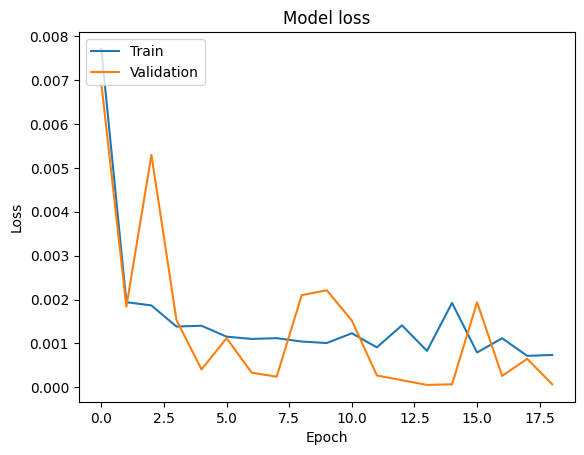

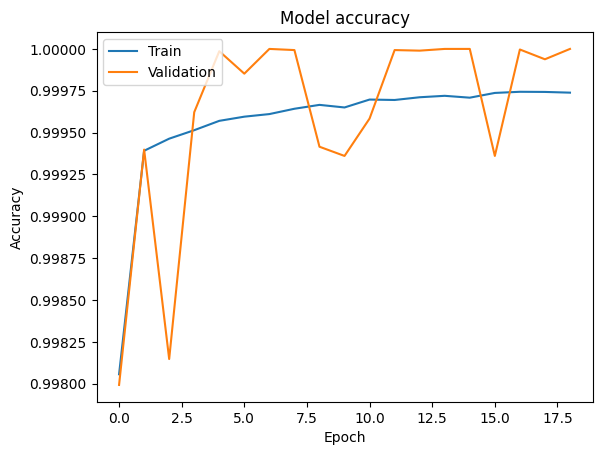

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
